In [2]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

1. Представити початковi данi графiчно.

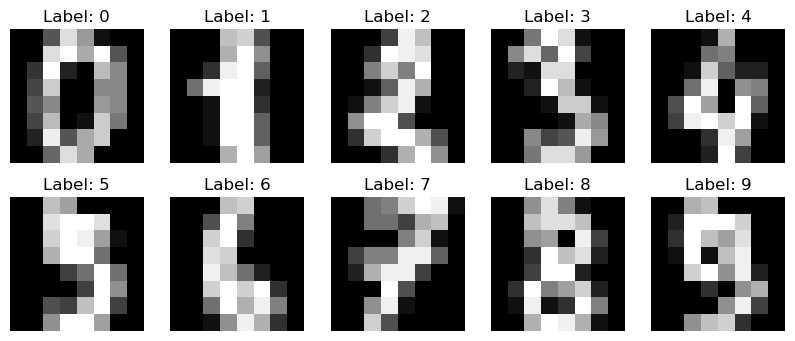

In [3]:
digits = load_digits()
data = digits.data
target = digits.target
# Відображення перших 10 зображень
plt.figure(figsize=(10, 4))
for index, (image, label) in enumerate(zip(data[:10], target[:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image.reshape(8, 8), cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

plt.show()

2. Розбити данi на навчальний та валiдацiйний набори.

In [4]:
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.2, random_state=42)

3. Побудувати на навчальному наборi даних моделi класифiкацiї або регресiї заданi згiдно з варiантом.

In [5]:
gaussian_model = GaussianNB()

# Тренування моделі на навчальному наборі даних
gaussian_model.fit(X_train, y_train)

GaussianNB()

In [6]:
multinomial_model = MultinomialNB()

# Тренування моделі на навчальному наборі даних
multinomial_model.fit(X_train, y_train)

MultinomialNB()

5. Виконати прогнози на основi побудованих моделей.

In [10]:
# Прогнози для GaussianNB
y_pred_gaussian_train = gaussian_model.predict(X_train)
y_pred_gaussian_val = gaussian_model.predict(X_val)
# Прогнози для MultinomialNB
y_pred_multinomial_train = multinomial_model.predict(X_train)
y_pred_multinomial_val = multinomial_model.predict(X_val)

6. Для кожної з моделей оцiнити, чи має мiсце перенавчання.
Обидві моделі не проявляють виразного перенавчання на навчальних даних, оскільки точність на 
валідаційних даних залишається високою. Таким чином, обидві моделі гарно впораються з завданням класифікації

Accuracy для GaussianNB (навчальний): 0.8559498956158664
Accuracy для GaussianNB (валідаційний): 0.8472222222222222
Accuracy для MultinomialNB (навчальний): 0.9053583855254002
Accuracy для MultinomialNB (валідаційний): 0.9111111111111111


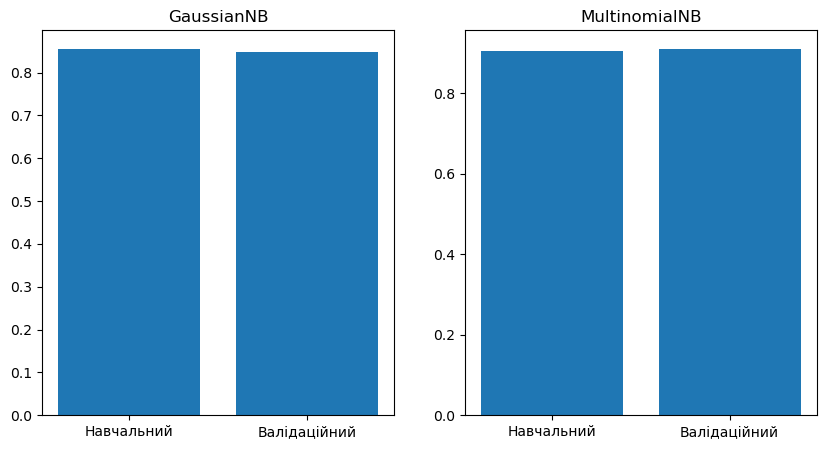

In [11]:
train_accuracy_gaussian = accuracy_score(y_train, y_pred_gaussian_train)
val_accuracy_gaussian = accuracy_score(y_val, y_pred_gaussian)

train_accuracy_multinomial = accuracy_score(y_train, y_pred_multinomial_train)
val_accuracy_multinomial = accuracy_score(y_val, y_pred_multinomial)

# Виведення результатів
print("Accuracy для GaussianNB (навчальний):", train_accuracy_gaussian)
print("Accuracy для GaussianNB (валідаційний):", val_accuracy_gaussian)

print("Accuracy для MultinomialNB (навчальний):", train_accuracy_multinomial)
print("Accuracy для MultinomialNB (валідаційний):", val_accuracy_multinomial)

# Відображення графіків
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("GaussianNB")
plt.bar(['Навчальний', 'Валідаційний'], [train_accuracy_gaussian, val_accuracy_gaussian])

plt.subplot(1, 2, 2)
plt.title("MultinomialNB")
plt.bar(['Навчальний', 'Валідаційний'], [train_accuracy_multinomial, val_accuracy_multinomial])

plt.show()

7. Розрахувати додатковi результати моделей, наприклад, апостерiорнi iмовiрностi або iншi (згiдно з варiантом).

In [12]:
# Розрахунок апостеріорних ймовірностей для GaussianNB
y_prob_gaussian = gaussian_model.predict_proba(X_train)

# Розрахунок апостеріорних ймовірностей для MultinomialNB
y_prob_multinomial = multinomial_model.predict_proba(X_train)

8. В задачах класифiкацiї побудувати границi рiшень графiчно для кожної з моделей.

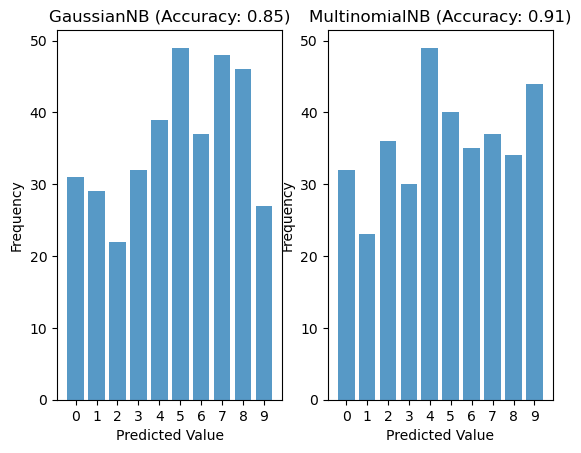

In [13]:
gaussian_accuracy = gaussian_model.score(X_val, y_val)

multinomial_accuracy = multinomial_model.score(X_val, y_val)

plt.subplot(1, 2, 1)
plt.hist(gaussian_model.predict(X_val), bins=np.arange(11) - 0.5, alpha=0.75, rwidth=0.8)
plt.xticks(np.arange(10))
plt.xlabel("Predicted Value")
plt.ylabel("Frequency")
plt.title(f'GaussianNB (Accuracy: {gaussian_accuracy:.2f})')

plt.subplot(1, 2, 2)
plt.hist(multinomial_model.predict(X_val), bins=np.arange(11) - 0.5, alpha=0.75, rwidth=0.8)
plt.xticks(np.arange(10))
plt.xlabel("Predicted Value")
plt.ylabel("Frequency")
plt.title(f'MultinomialNB (Accuracy: {multinomial_accuracy:.2f})')

plt.show()

9. В задачах класифiкацiї розрахувати для кожної моделi значення наступних критерiїв якостi, окремо на навчальнiй та валiдацiйнiй множинах

• Матрицю неточностей (confusion matrix):

In [14]:
# Розрахунок матриці неточностей для навчальної вибірки
confusion_matrix_gaussian_train = confusion_matrix(y_train, y_pred_gaussian_train)
confusion_matrix_multinomial_train = confusion_matrix(y_train, y_pred_multinomial_train)

# Розрахунок матриці неточностей для валідаційної вибірки
confusion_matrix_gaussian_val = confusion_matrix(y_val, y_pred_gaussian_val)
confusion_matrix_multinomial_val = confusion_matrix(y_val, y_pred_multinomial_val)

# Виведення матриць неточностей
print("Матриця неточностей для Gaussian (навчальна):\n", confusion_matrix_gaussian_train)
print("Матриця неточностей для Gaussian (валідаційна):\n", confusion_matrix_gaussian_val)

print("Матриця неточностей для Multinomial (навчальна):\n", confusion_matrix_multinomial_train)
print("Матриця неточностей для Multinomial (валідаційна):\n", confusion_matrix_multinomial_val)

Матриця неточностей для Gaussian (навчальна):
 [[144   0   0   0   1   0   0   0   0   0]
 [  0 123   1   0   0   0   5   7  12   6]
 [  0  12  93   0   0   1   0   0  38   0]
 [  0   2   1 115   0   3   0   6  20   2]
 [  1   1   0   0 115   1   2  13   2   0]
 [  0   0   0   1   0 126   0   5   2   1]
 [  0   1   0   0   0   1 144   0   0   0]
 [  0   0   0   0   1   0   0 144   0   0]
 [  0   5   0   1   0   3   0   8 127   0]
 [  2   6   0   2   0   2   0  13  16  99]]
Матриця неточностей для Gaussian (валідаційна):
 [[31  0  0  0  0  1  0  1  0  0]
 [ 0 24  0  0  0  0  0  0  3  1]
 [ 0  2 20  0  0  0  1  0 10  0]
 [ 0  0  1 29  0  1  0  0  3  0]
 [ 0  0  0  0 38  0  1  7  0  0]
 [ 0  0  0  1  0 44  1  1  0  0]
 [ 0  0  0  0  1  0 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  2  0  0  0  0  0  2 26  0]
 [ 0  1  1  2  0  2  0  4  4 26]]
Матриця неточностей для Multinomial (навчальна):
 [[143   0   0   0   2   0   0   0   0   0]
 [  0 116  11   0   0   1   3   0  10  13]
 [  0 

• точнiсть (precision):

In [98]:
# Розрахунок точності для навчальної вибірки
precision_gaussian_train = precision_score(y_train, y_pred_gaussian_train, average='macro')
precision_multinomial_train = precision_score(y_train, y_pred_multinomial_train, average='macro')

# Розрахунок точності для валідаційної вибірки
precision_gaussian_val = precision_score(y_val, y_pred_gaussian_val, average='macro')
precision_multinomial_val = precision_score(y_val, y_pred_multinomial_val, average='macro')

# Виведення значень точності
print("Точність для Gaussian (навчальна):", precision_gaussian_train)
print("Точність для Gaussian (валідаційна):", precision_gaussian_val)

print("Точність для Multinomial (навчальна):", precision_multinomial_train)
print("Точність для Multinomial (валідаційна):", precision_multinomial_val)

Точність для Gaussian (навчальна): 0.8837796156425505
Точність для Gaussian (валідаційна): 0.8649844547206135
Точність для Multinomial (навчальна): 0.9109608874853183
Точність для Multinomial (валідаційна): 0.9131056013545967


• повноту (recall):

In [99]:
recall_gaussian_train = recall_score(y_train, y_pred_gaussian_train, average='macro')
recall_multinomial_train = recall_score(y_train, y_pred_multinomial_train, average='macro')

# Розрахунок повноти для валідаційної вибірки
recall_gaussian_val = recall_score(y_val, y_pred_gaussian_val, average='macro')
recall_multinomial_val = recall_score(y_val, y_pred_multinomial_val, average='macro')

# Виведення значень повноти
print("Повнота для Gaussian (навчальна):", recall_gaussian_train)
print("Повнота для Gaussian (валідаційна):", recall_gaussian_val)

print("Повнота для Multinomial (навчальна):", recall_multinomial_train)
print("Повнота для Multinomial (валідаційна):", recall_multinomial_val)

Повнота для Gaussian (навчальна): 0.856312746575877
Повнота для Gaussian (валідаційна): 0.8476479221745045
Повнота для Multinomial (навчальна): 0.906329683796527
Повнота для Multinomial (валідаційна): 0.9090278703357552


• мiру F1 (F1 score):

In [100]:
f1_gaussian_train = f1_score(y_train, y_pred_gaussian_train, average='macro')
f1_multinomial_train = f1_score(y_train, y_pred_multinomial_train, average='macro')

# Розрахунок F1 score для валідаційної вибірки
f1_gaussian_val = f1_score(y_val, y_pred_gaussian_val, average='macro')
f1_multinomial_val = f1_score(y_val, y_pred_multinomial_val, average='macro')

# Виведення значень F1 score
print("F1 score для Gaussian (навчальна):", f1_gaussian_train)
print("F1 score для Gaussian (валідаційна):", f1_gaussian_val)

print("F1 score для Multinomial (навчальна):", f1_multinomial_train)
print("F1 score для Multinomial (валідаційна):", f1_multinomial_val)

F1 score для Gaussian (навчальна): 0.8587392484723713
F1 score для Gaussian (валідаційна): 0.8437352605469787
F1 score для Multinomial (навчальна): 0.9064852033326947
F1 score для Multinomial (валідаційна): 0.9083651471338392


• побудувати криву точностi-повноти (precision-recall (PR) curve), ROC-криву, показник AUC:

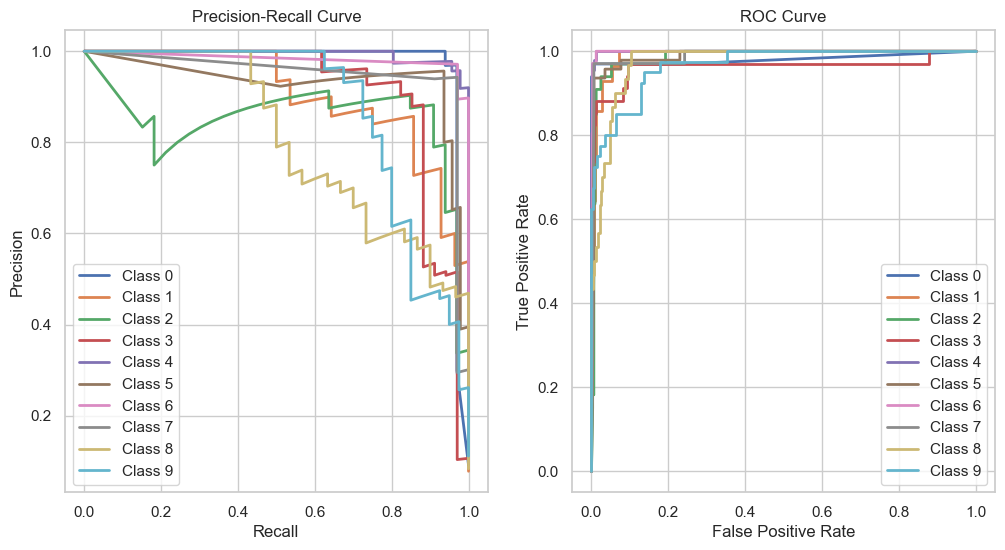

Multiclass AUC: 0.98


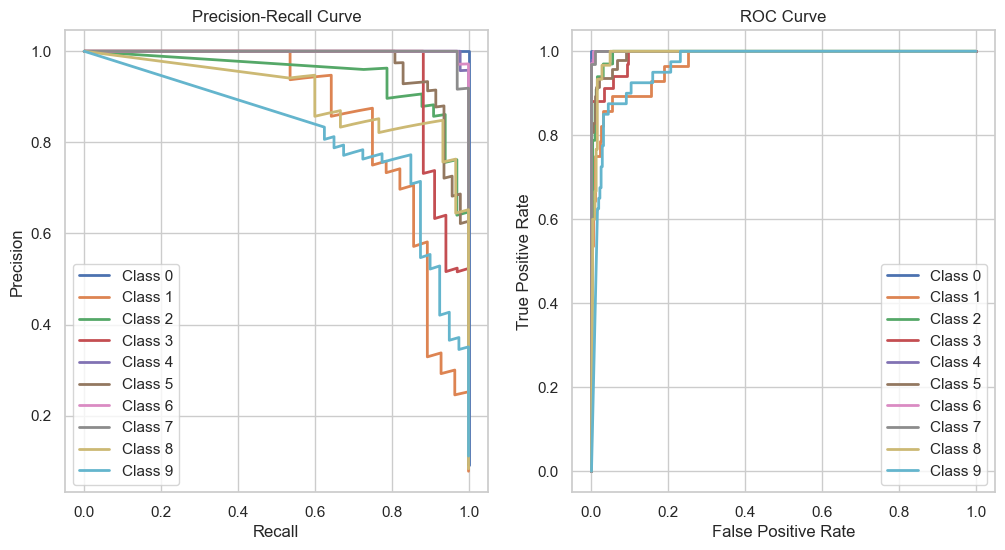

Multiclass AUC: 0.99


In [101]:
def multiclass_metrics(clf, X, y, n_classes):
    # Precision-Recall curves
    y_scores = clf.predict_proba(X)
    one_hot_encoded = np.eye(n_classes)[y]

    plt.figure(figsize=(12, 6))

    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(one_hot_encoded[:, i], y_scores[:, i])
        plt.subplot(1, 2, 1)
        plt.plot(recall, precision, lw=2, label=f'Class {i}')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="best")
    plt.title("Precision-Recall Curve")

    # ROC curves
    fpr = dict()
    tpr = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(one_hot_encoded[:, i], y_scores[:, i])
        plt.subplot(1, 2, 2)
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i}')

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="best")
    plt.title("ROC Curve")

    plt.show()

    # Multiclass AUC
    auc = roc_auc_score(one_hot_encoded, y_scores, average='macro')
    print('Multiclass AUC: {:.2f}'.format(auc))

multiclass_metrics(gaussian_model, X_val, y_val, n_classes=10)
multiclass_metrics(multinomial_model, X_val, y_val, n_classes=10)

11. Спробувати виконати решiтчастий пошук (grid search) для пiдбору гiперпараметрiв моделей.

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid_gaussian = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

param_grid_multinomial = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}

gaussian_model = GaussianNB()
multinomial_model = MultinomialNB()

grid_search_gaussian = GridSearchCV(gaussian_model, param_grid_gaussian, cv=5, scoring='accuracy')
grid_search_multinomial = GridSearchCV(multinomial_model, param_grid_multinomial, cv=5, scoring='accuracy')

grid_search_gaussian.fit(X_train, y_train)
grid_search_multinomial.fit(X_train, y_train)

best_params_gaussian = grid_search_gaussian.best_params_
best_score_gaussian = grid_search_gaussian.best_score_

best_params_multinomial = grid_search_multinomial.best_params_
best_score_multinomial = grid_search_multinomial.best_score_

print("Найкраща оцінка для GaussianNB:", best_score_gaussian)
print("Найкраща оцінка для MultinomialNB:", best_score_multinomial)

Найкраща оцінка для GaussianNB: 0.8874517448304857
Найкраща оцінка для MultinomialNB: 0.8998203569926995


12. Зробити висновки про якiсть роботи моделей на дослiджених даних. На
основi критерiїв якостi спробувати обрати найкращу модель.

З урахуванням результатів, модель Multinomial Naive Bayes виглядає більш обіцяючою для даних, оскільки вона досягла кращих результатів за більшістю критеріїв якості порівняно з моделлю Gaussian Naive Bayes.

13. Навчити моделi на пiдмножинах навчальних даних. Оцiнити, наскiльки
розмiр навчальної множини впливає на якiсть моделi.

In [82]:
sample_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Ініціалізація списків для збереження результатів
accuracy_gaussian = []
accuracy_multinomial = []

# Повторіть процес для різних розмірів навчальної вибірки
for size in sample_sizes:
    # Розділення даних на навчальну та валідаційну вибірку
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1 - size, random_state=42)
    
    # Навчання Gaussian Naive Bayes
    gaussian_model = GaussianNB()
    gaussian_model.fit(X_train, y_train)
    y_pred_gaussian = gaussian_model.predict(X_val)
    accuracy_gaussian.append(accuracy_score(y_val, y_pred_gaussian))
    
    # Навчання Multinomial Naive Bayes
    multinomial_model = MultinomialNB()
    multinomial_model.fit(X_train, y_train)
    y_pred_multinomial = multinomial_model.predict(X_val)
    accuracy_multinomial.append(accuracy_score(y_val, y_pred_multinomial))

# Виведення результатів
for i, size in enumerate(sample_sizes):
    print(f"Розмір навчальної вибірки: {size * 100}%")
    print(f"Точність для Gaussian: {accuracy_gaussian[i]}")
    print(f"Точність для Multinomial: {accuracy_multinomial[i]}\n")

Розмір навчальної вибірки: 10.0%
Точність для Gaussian: 0.742274412855377
Точність для Multinomial: 0.8671199011124846

Розмір навчальної вибірки: 20.0%
Точність для Gaussian: 0.7962447844228094
Точність для Multinomial: 0.8831710709318498

Розмір навчальної вибірки: 30.0%
Точність для Gaussian: 0.814785373608903
Точність для Multinomial: 0.8982511923688394

Розмір навчальної вибірки: 40.0%
Точність для Gaussian: 0.8016682113067656
Точність для Multinomial: 0.8980537534754403

Розмір навчальної вибірки: 50.0%
Точність для Gaussian: 0.7686318131256952
Точність для Multinomial: 0.8943270300333704

Розмір навчальної вибірки: 60.0%
Точність для Gaussian: 0.8317107093184979
Точність для Multinomial: 0.8915159944367177

Розмір навчальної вибірки: 70.0%
Точність для Gaussian: 0.8518518518518519
Точність для Multinomial: 0.8944444444444445

Розмір навчальної вибірки: 80.0%
Точність для Gaussian: 0.8472222222222222
Точність для Multinomial: 0.9111111111111111

Розмір навчальної вибірки: 90.0%
Т

Звідси видно: чим менший набір навчальних даних, тим гірші результати